In [1]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
from docplex.mp.model import Model
import random
import cplex
import gurobipy as gp
import time

# docplex

In [2]:
model = Model('LP-model')

In [3]:
x1 = model.binary_var("x1")
x2 = model.binary_var("x2")
x3 = model.binary_var("x3")
x4 = model.binary_var("x4")
x5 = model.binary_var("x5")


In [4]:
model.maximize((0-random.randrange(10))*x1+
               (0-random.randrange(10))*x2+
               (0-random.randrange(10))*x3+
               (0-random.randrange(10))*x4+
               (0-random.randrange(10))*x5)

In [5]:
model.add_constraint(x1+x2+x3+x4+x5==3)
print(model.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: LP-model

Maximize
 obj: - 7 x1 - 6 x2 - 8 x3 - 7 x4 - 2 x5
Subject To
 c1: x1 + x2 + x3 + x4 + x5 = 3

Bounds
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1

Binaries
 x1 x2 x3 x4 x5
End



In [6]:
start = time.time()
model.solve()
seconds = time.time() - start
print(seconds*1000) # miliseconds

15.957117080688477


In [7]:
model.solution

docplex.mp.solution.SolveSolution(obj=-15,values={x1:1,x2:1,x5:1})

# QAOA

In [8]:
from qiskit.utils import algorithm_globals
from qiskit.algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_histogram
from typing import List, Tuple
import numpy as np
from qiskit_optimization.converters import LinearEqualityToPenalty
from qiskit_optimization.converters import IntegerToBinary
from qiskit_optimization.converters import QuadraticProgramToQubo


In [9]:
quadratic_model = from_docplex_mp(model)
print(quadratic_model.prettyprint())

Problem name: LP-model

Maximize
  -7*x1 - 6*x2 - 8*x3 - 7*x4 - 2*x5

Subject to
  Linear constraints (1)
    x1 + x2 + x3 + x4 + x5 == 3  'c0'

  Binary variables (5)
    x1 x2 x3 x4 x5



In [10]:
cov = QuadraticProgramToQubo()
qubo = cov.convert(quadratic_model)
print(qubo.prettyprint())

Problem name: LP-model

Minimize
  31*x1^2 + 62*x1*x2 + 62*x1*x3 + 62*x1*x4 + 62*x1*x5 + 31*x2^2 + 62*x2*x3
  + 62*x2*x4 + 62*x2*x5 + 31*x3^2 + 62*x3*x4 + 62*x3*x5 + 31*x4^2 + 62*x4*x5
  + 31*x5^2 - 179*x1 - 180*x2 - 178*x3 - 179*x4 - 184*x5 + 279

Subject to
  No constraints

  Binary variables (5)
    x1 x2 x3 x4 x5



In [11]:
op, offset = qubo.to_ising()
print("offset: {}".format(offset))
print("operator:")
print(op)

offset: 61.5
operator:
12.0 * IIIIZ
+ 12.5 * IIIZI
+ 11.5 * IIZII
+ 12.0 * IZIII
+ 14.5 * ZIIII
+ 15.5 * IIIZZ
+ 15.5 * IIZIZ
+ 15.5 * IIZZI
+ 15.5 * IZIIZ
+ 15.5 * IZIZI
+ 15.5 * IZZII
+ 15.5 * ZIIIZ
+ 15.5 * ZIIZI
+ 15.5 * ZIZII
+ 15.5 * ZZIII


######

In [12]:
algorithm_globals.random_seed = 10598
qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
exact_mes = NumPyMinimumEigensolver()

In [13]:
qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA
exact = MinimumEigenOptimizer(exact_mes)  # using the exact classical numpy minimum eigen solver

In [14]:
start = time.time()
exact_result = exact.solve(qubo)
seconds = time.time() - start
print(seconds*1000) # miliseconds
print(exact_result.prettyprint())

33.77032279968262
objective function value: 15.0
variable values: x1=1.0, x2=1.0, x3=0.0, x4=0.0, x5=1.0
status: SUCCESS


In [16]:
start = time.time()
qaoa_result = qaoa.solve(qubo)
seconds = time.time() - start
print(seconds*1000) # miliseconds
print(qaoa_result.prettyprint())

30804.935455322266
objective function value: 15.0
variable values: x1=1.0, x2=1.0, x3=0.0, x4=0.0, x5=1.0
status: SUCCESS


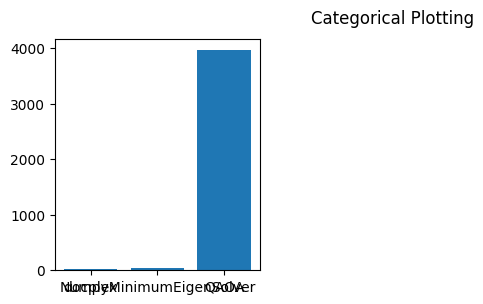

In [17]:
import matplotlib.pyplot as plt
names = ['docplex', 'NumpyMinimumEigenSolver', 'QAOA']
values = [24.179458618164062, 33.31732749938965, 3961.585760116577]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

In [23]:
matplotlib inline

In [25]:
matplotlib inline
plt.show()

SyntaxError: invalid syntax (1095155696.py, line 1)

In [32]:
%matplotlib inline
%matplotlib auto

#
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Using matplotlib backend: <object object at 0x00000274CDC74900>
